In [ ]:
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pylab as plt
from tabulate import tabulate
import seaborn as sns

%matplotlib inline
from sklearn.linear_model import LogisticRegression
from google.colab import drive
#mounting my google driving to access data
drive.mount('/content/drive')

Mounted at /content/drive


Below I am creating a Pandas data frame to observe the effectiveness of LA support over the observed time frame.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Second Year Project/Student Data /Logistic_Data_LA_Level_DFW.csv')

df2 = pd.read_csv('/content/drive/MyDrive/Second Year Project/Student Data /Logistic_Data_LA_Level_SYG.csv')


<ipython-input-2-3f9b7e0ad518>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Second Year Project/Student Data /Logistic_Data_LA_Level_DFW.csv')


I am narrowing down the data to only look at University Physics I and II which I will call UP1 and UP2 moving forward. I am also getting rid of all Labs, getting rid of classes not taken at the Rochester campus, and last I am getting rid of all classes taken since the start of the pandemic to account for the change in the grading system that took place during.

In [ ]:
df = df[(df['subject'] == 'PHYS') & ((df['catalog_nbr'] == '211') | (df['catalog_nbr'] == '212'))]
df = df[~(df['section Type'] == 'LAB')]
df = df[(df['class_section'] != '600') & (df['class_section'] != '601')]
df = df[df['Term'] <= 2195]

Below I am creating a histogram of DFW rates for students with various levels of LA exposure

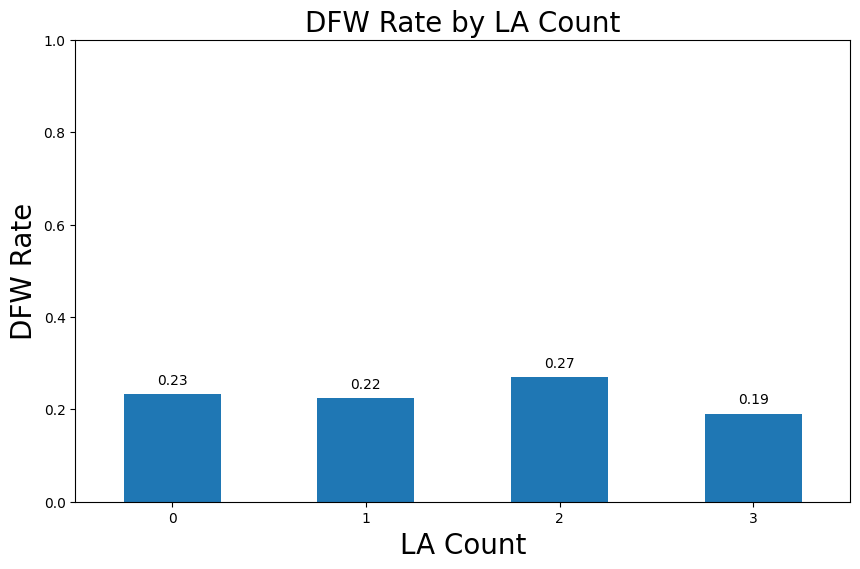

In [ ]:
# Filter the DataFrame to include only 'LA Count' values between 0 and 5
df_filtered = df[(df['LA Count'] <= 3)]

# Step 1: Calculate the total number of students for each 'LA Count'
total_students = df_filtered.groupby('LA Count').size()

# Step 2: Calculate the number of students who received a DFW grade for each 'LA Count'
dfw_students = df_filtered[df_filtered['DFW dummy'] == 1].groupby('LA Count').size()

# Step 3: Calculate the proportion of students who received a DFW grade for each 'LA Count'
proportion_dfw = dfw_students / total_students

# Step 4: Plot the histogram
plt.figure(figsize=(10, 6))
ax = proportion_dfw.plot(kind='bar')

# Add labels to each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Customizing the plot
plt.xlabel('LA Count', fontsize=20)
plt.ylabel('DFW Rate', fontsize=20)
plt.title('DFW Rate by LA Count', fontsize=20)
plt.ylim(0, 1)  # Ensure y-axis is between 0 and 1 for proportion
plt.xticks(rotation=0)
plt.show()

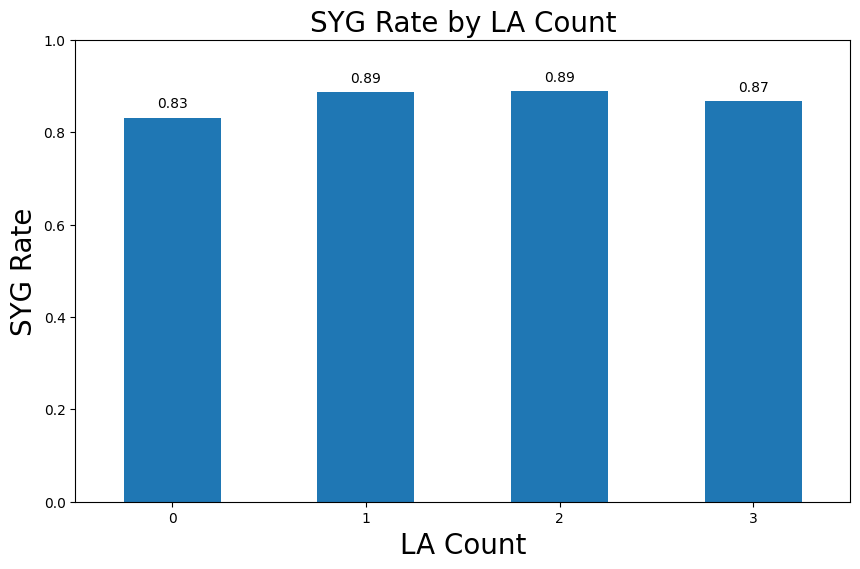

In [ ]:
# Filter the DataFrame to include only 'LA Count' values between 0 and 5
df_filtered = df2[(df2['LA Count'] <= 3)]

# Step 1: Calculate the total number of students for each 'LA Count'
total_students = df_filtered.groupby('LA Count').size()

# Step 2: Calculate the number of students who received a SYG grade for each 'LA Count'
syg_students = df_filtered[df_filtered['SYG'] == 1].groupby('LA Count').size()

# Step 3: Calculate the proportion of students who received a SYG grade for each 'LA Count'
proportion_syg = syg_students / total_students

# Step 4: Plot the histogram
plt.figure(figsize=(10, 6))
ax = proportion_syg.plot(kind='bar')

# Add labels to each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Customizing the plot
plt.xlabel('LA Count', fontsize=20)
plt.ylabel('SYG Rate', fontsize=20)
plt.title('SYG Rate by LA Count', fontsize=20)
plt.ylim(0, 1)  # Ensure y-axis is between 0 and 1 for proportion
plt.xticks(rotation=0)
plt.show()

In [ ]:
df['LA Count'].value_counts()

LA Count
0    7811
1     829
2     219
3      63
4       8
6       5
5       5
7       1
Name: count, dtype: int64

In [ ]:


# Create the predictor variable
Xtrain = df[['LA Count']]

# Define the response variable
ytrain_DFW = df['DFW dummy']

# Fit the logistic regression model
log_reg_With_DFW = sm.Logit(ytrain_DFW, Xtrain).fit()

# Print the summary table
print(log_reg_With_DFW.summary())

Optimization terminated successfully.
         Current function value: 0.652928
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              DFW dummy   No. Observations:              1573587
Model:                          Logit   Df Residuals:                  1573586
Method:                           MLE   Df Model:                            0
Date:                Mon, 10 Jun 2024   Pseudo R-squ.:                  -1.040
Time:                        15:43:22   Log-Likelihood:            -1.0274e+06
converged:                       True   LL-Null:                   -5.0372e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LA Count      -1.5296      0.007   -223.908      0.000      -1.543      -1.516


In [ ]:
# # Filter the DataFrame to include only the rows where 'LA Count' is equal to 1
df_filtered = df[df['LA Count'] == 1]

# Create the predictor variable
Xtrain = df_filtered[['LA Count']]

# Add a constant to the predictor variables (if needed for the intercept)
Xtrain = sm.add_constant(Xtrain)

# Define the response variable
ytrain_DFW = df_filtered['DFW dummy']

# Fit the logistic regression model
log_reg_With_DFW = sm.Logit(ytrain_DFW, Xtrain).fit()

# Print the summary table
print(log_reg_With_DFW.summary())

Optimization terminated successfully.
         Current function value: 0.246468
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              DFW dummy   No. Observations:                86765
Model:                          Logit   Df Residuals:                    86764
Method:                           MLE   Df Model:                            0
Date:                Mon, 10 Jun 2024   Pseudo R-squ.:               6.625e-11
Time:                        15:43:52   Log-Likelihood:                -21385.
converged:                       True   LL-Null:                       -21385.
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LA Count      -2.6297      0.014   -194.004      0.000      -2.656      -2.603
